# Import Dependencies

In [93]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

from nltk.corpus import stopwords
from textblob import Word
from textblob import TextBlob
import re

from datetime import datetime

%matplotlib inline

# Read into Python

In [94]:
#load dataset
df = pd.read_csv('employee_reviews.csv')
df.head(5)

Unnamed: 0 company           location          dates  \
0           1  google               none   Dec 11, 2018   
1           2  google  Mountain View, CA   Jun 21, 2013   
2           3  google       New York, NY   May 10, 2014   
3           4  google  Mountain View, CA    Feb 8, 2015   
4           5  google    Los Angeles, CA   Jul 19, 2018   

                                  job-title  \
0     Current Employee - Anonymous Employee   
1         Former Employee - Program Manager   
2  Current Employee - Software Engineer III   
3     Current Employee - Anonymous Employee   
4       Former Employee - Software Engineer   

                                             summary  \
0                           Best Company to work for   
1  Moving at the speed of light, burn out is inev...   
2  Great balance between big-company security and...   
3  The best place I've worked and also the most d...   
4                    Unique, one of a kind dream job   

                                                pros  \
0                      People are smart and friendly   
1  1) Food, food, food. 15+ cafes on main campus ...   
2  * If you're a software engineer, you're among ...   
3  You can't find a more well-regarded company th...   
4  Google is a world of its own. At every other c...   

                                                cons  \
0                 Bureaucracy is slowing things down   
1  1) Work/life balance. What balance? All those ...   
2  * It *is* becoming larger, and with it comes g...   
3  I live in SF so the commute can take between 1...   
4  If you don't work in MTV (HQ), you will be giv...   

                                      advice-to-mgmt  overall-ratings  \
0                                               none              5.0   
1  1) Don't dismiss emotional intelligence and ad...              4.0   
2  Keep the focus on the user. Everything else wi...              5.0   
3  Keep on NOT micromanaging - that is a huge ben...              5.0   
4  Promote managers into management for their man...              5.0   

  work-balance-stars culture-values-stars carrer-opportunities-stars  \
0                4.0                  5.0                        5.0   
1                2.0                  3.0                        3.0   
2                5.0                  4.0                        5.0   
3                2.0                  5.0                        5.0   
4                5.0                  5.0                        5.0   

  comp-benefit-stars senior-mangemnet-stars  helpful-count  \
0                4.0                    5.0              0   
1                5.0                    3.0           2094   
2                5.0                    4.0            949   
3                4.0                    5.0            498   
4                5.0                    5.0             49   

                                                link  
0  https://www.glassdoor.com/Reviews/Google-Revie...  
1  https://www.glassdoor.com/Reviews/Google-Revie...  
2  https://www.glassdoor.com/Reviews/Google-Revie...  
3  https://www.glassdoor.com/Reviews/Google-Revie...  
4  https://www.glassdoor.com/Reviews/Google-Revie...

In [95]:
#removing unwanted columns
df.drop(['Unnamed: 0','link'], axis=1, inplace=True)

In [96]:
df.rename(columns={'overall-ratings':'rating'}, inplace=True)

In [97]:
df['location'].replace('none', np.nan, inplace=True)

In [98]:
df['location'].isnull().sum()

25085

In [99]:
df.shape

(67529, 15)

In [100]:
df['summary'].replace('', np.nan, inplace=True)
df.dropna(subset=['summary'], inplace=True)

In [101]:
df.shape

(67409, 15)

In [102]:
df.describe()

rating  helpful-count
count  67409.000000   67409.000000
mean       3.826640       1.266433
std        1.154487      16.098591
min        1.000000       0.000000
25%        3.000000       0.000000
50%        4.000000       0.000000
75%        5.000000       1.000000
max        5.000000    2094.000000

In [103]:
df['word_count'] = df['summary'].apply(lambda x: len(str(x).split()))

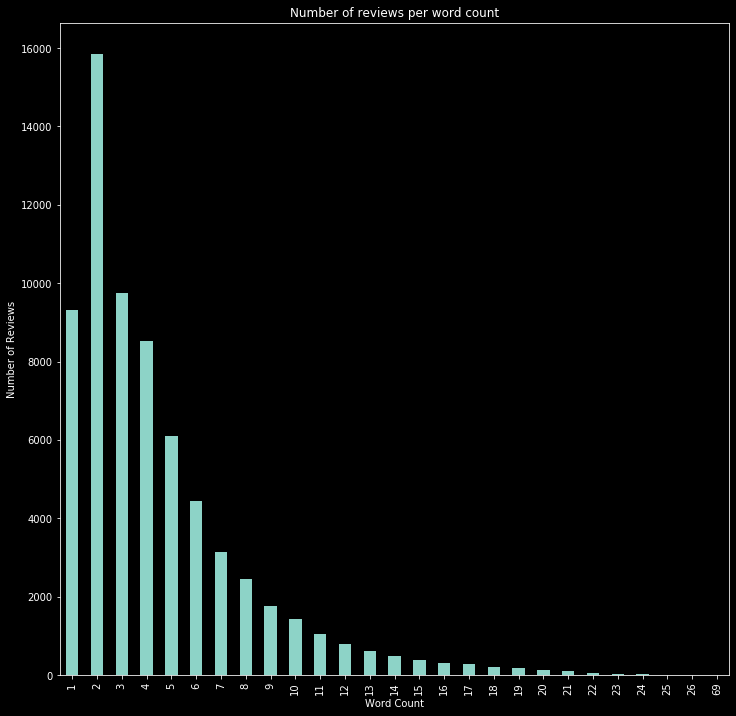

In [105]:
df.word_count.value_counts().sort_index().plot(kind='bar', figsize=(12,12));     # bigger plot by increasing age
plt.xlabel('Word Count');
plt.ylabel('Number of Reviews');
plt.title('Number of reviews per word count');

plt.style.use('dark_background');

# Detecting Polarity of Summary Reviews using TextBlob and NLTK

In [134]:
# define a function that accepts text and returns the polarity
def detect_sentiment(text):
    return TextBlob(str(text)).sentiment.polarity

In [135]:
# create a new DataFrame column for sentiment (WARNING: SLOW!)
df['textblob_sentiment'] = df['summary'].apply(detect_sentiment)

In [136]:
df.head()

company           location         dates  \
0  google                NaN   Dec 11 2018   
1  google  Mountain View, CA   Jun 21 2013   
2  google       New York, NY   May 10 2014   
3  google  Mountain View, CA    Feb 8 2015   
4  google    Los Angeles, CA   Jul 19 2018   

                                  job-title  \
0     Current Employee - Anonymous Employee   
1         Former Employee - Program Manager   
2  Current Employee - Software Engineer III   
3     Current Employee - Anonymous Employee   
4       Former Employee - Software Engineer   

                                             summary  \
0                           Best Company to work for   
1  Moving at the speed of light, burn out is inev...   
2  Great balance between big-company security and...   
3  The best place I've worked and also the most d...   
4                    Unique, one of a kind dream job   

                                                pros  \
0                      People are smart and friendly   
1  1) Food, food, food. 15+ cafes on main campus ...   
2  * If you're a software engineer, you're among ...   
3  You can't find a more well-regarded company th...   
4  Google is a world of its own. At every other c...   

                                                cons  \
0                 Bureaucracy is slowing things down   
1  1) Work/life balance. What balance? All those ...   
2  * It *is* becoming larger, and with it comes g...   
3  I live in SF so the commute can take between 1...   
4  If you don't work in MTV (HQ), you will be giv...   

                                      advice-to-mgmt  rating  \
0                                               none     5.0   
1  1) Don't dismiss emotional intelligence and ad...     4.0   
2  Keep the focus on the user. Everything else wi...     5.0   
3  Keep on NOT micromanaging - that is a huge ben...     5.0   
4  Promote managers into management for their man...     5.0   

  work-balance-stars  ... helpful-count word_count textblob_sentiment  \
0                4.0  ...             0          5             1.0000   
1                2.0  ...          2094         10             0.2000   
2                5.0  ...           949          9             0.5500   
3                2.0  ...           498         10             0.7500   
4                5.0  ...            49          7             0.4875   

  nltk_sentiment     label  class   datetime    year  day_name  month  
0         0.6369  positive      1 2018-12-11  2018.0   Tuesday   12.0  
1         0.0000  positive      1 2013-06-21  2013.0    Friday    6.0  
2         0.8689  positive      1 2014-05-10  2014.0  Saturday    5.0  
3         0.4601  positive      1 2015-02-08  2015.0    Sunday    2.0  
4         0.6597  positive      1 2018-07-19  2018.0  Thursday    7.0  

[5 rows x 24 columns]

In [117]:
def label(i):
    if i < 0:
        return "negative"
    if i == 0:
        return "neutral"
    if i > 0:
        return "positive"
    
df['label'] = df['textblob_sentiment'].apply(label)

In [118]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

compound= []

for review in df['summary']:
    sent = sia.polarity_scores(str(review))
    
    compound.append(sent['compound'])

In [119]:
df['nltk_sentiment'] = compound

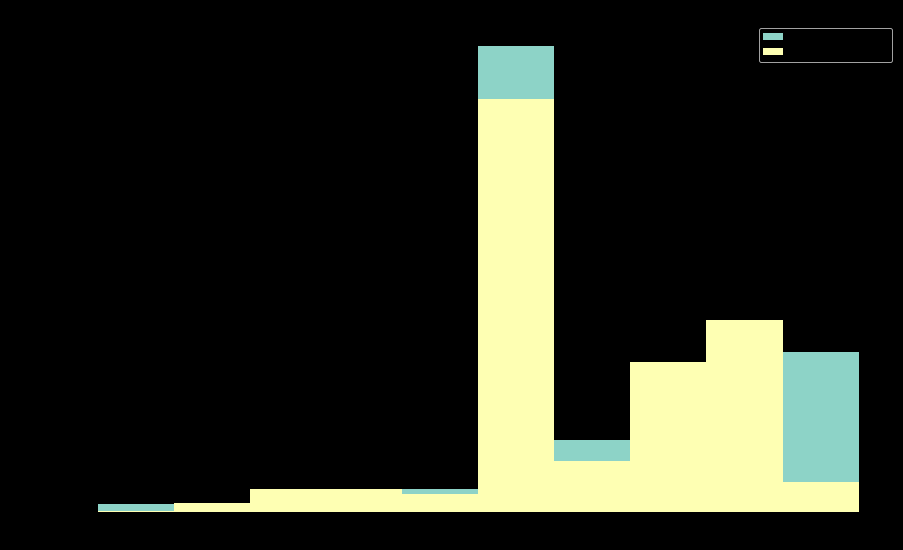

In [120]:
df[['textblob_sentiment', 'nltk_sentiment']].plot(kind='hist', bins=10, title='Distribution of Review Sentiment by Method',
                                  figsize=(15, 9), style={'textblob_sentiment': 'r', 'nltk_sentiment':'g'});
plt.xlabel('Sentiment');
plt.ylabel('Count');

In [121]:
# map existing values to a different set of values
df['class'] = df.label.map({'positive':1, 'negative':0, 'neutral':2})

In [122]:
df.head()

company           location          dates  \
0  google                NaN   Dec 11, 2018   
1  google  Mountain View, CA   Jun 21, 2013   
2  google       New York, NY   May 10, 2014   
3  google  Mountain View, CA    Feb 8, 2015   
4  google    Los Angeles, CA   Jul 19, 2018   

                                  job-title  \
0     Current Employee - Anonymous Employee   
1         Former Employee - Program Manager   
2  Current Employee - Software Engineer III   
3     Current Employee - Anonymous Employee   
4       Former Employee - Software Engineer   

                                             summary  \
0                           Best Company to work for   
1  Moving at the speed of light, burn out is inev...   
2  Great balance between big-company security and...   
3  The best place I've worked and also the most d...   
4                    Unique, one of a kind dream job   

                                                pros  \
0                      People are smart and friendly   
1  1) Food, food, food. 15+ cafes on main campus ...   
2  * If you're a software engineer, you're among ...   
3  You can't find a more well-regarded company th...   
4  Google is a world of its own. At every other c...   

                                                cons  \
0                 Bureaucracy is slowing things down   
1  1) Work/life balance. What balance? All those ...   
2  * It *is* becoming larger, and with it comes g...   
3  I live in SF so the commute can take between 1...   
4  If you don't work in MTV (HQ), you will be giv...   

                                      advice-to-mgmt  rating  \
0                                               none     5.0   
1  1) Don't dismiss emotional intelligence and ad...     4.0   
2  Keep the focus on the user. Everything else wi...     5.0   
3  Keep on NOT micromanaging - that is a huge ben...     5.0   
4  Promote managers into management for their man...     5.0   

  work-balance-stars culture-values-stars carrer-opportunities-stars  \
0                4.0                  5.0                        5.0   
1                2.0                  3.0                        3.0   
2                5.0                  4.0                        5.0   
3                2.0                  5.0                        5.0   
4                5.0                  5.0                        5.0   

  comp-benefit-stars senior-mangemnet-stars  helpful-count  word_count  \
0                4.0                    5.0              0           5   
1                5.0                    3.0           2094          10   
2                5.0                    4.0            949           9   
3                4.0                    5.0            498          10   
4                5.0                    5.0             49           7   

   textblob_sentiment  nltk_sentiment     label  class  
0              1.0000          0.6369  positive      1  
1              0.2000          0.0000  positive      1  
2              0.5500          0.8689  positive      1  
3              0.7500          0.4601  positive      1  
4              0.4875          0.6597  positive      1

# Extracting Time from Dates

In [123]:
#removing commas
df['dates'] = df['dates'].str.replace('[^\w\s]','')

In [124]:
df['datetime'] = pd.to_datetime(df['dates'], format=' %b %d %Y', errors='coerce')

In [125]:
#Extracting Year
df['year'] = df['datetime'].dt.year
#Extracting the weekday name of the date
df['day_name'] = df['datetime'].dt.day_name()
df['month'] = df['datetime'].dt.month

In [126]:
df.head(3)

company           location         dates  \
0  google                NaN   Dec 11 2018   
1  google  Mountain View, CA   Jun 21 2013   
2  google       New York, NY   May 10 2014   

                                  job-title  \
0     Current Employee - Anonymous Employee   
1         Former Employee - Program Manager   
2  Current Employee - Software Engineer III   

                                             summary  \
0                           Best Company to work for   
1  Moving at the speed of light, burn out is inev...   
2  Great balance between big-company security and...   

                                                pros  \
0                      People are smart and friendly   
1  1) Food, food, food. 15+ cafes on main campus ...   
2  * If you're a software engineer, you're among ...   

                                                cons  \
0                 Bureaucracy is slowing things down   
1  1) Work/life balance. What balance? All those ...   
2  * It *is* becoming larger, and with it comes g...   

                                      advice-to-mgmt  rating  \
0                                               none     5.0   
1  1) Don't dismiss emotional intelligence and ad...     4.0   
2  Keep the focus on the user. Everything else wi...     5.0   

  work-balance-stars  ... helpful-count word_count textblob_sentiment  \
0                4.0  ...             0          5               1.00   
1                2.0  ...          2094         10               0.20   
2                5.0  ...           949          9               0.55   

  nltk_sentiment     label  class   datetime    year  day_name  month  
0         0.6369  positive      1 2018-12-11  2018.0   Tuesday   12.0  
1         0.0000  positive      1 2013-06-21  2013.0    Friday    6.0  
2         0.8689  positive      1 2014-05-10  2014.0  Saturday    5.0  

[3 rows x 24 columns]

In [127]:
print(min(df['datetime']), max(df['datetime']))

2008-01-31 00:00:00 2018-12-11 00:00:00


In [128]:
df.groupby('year').summary.count()

year
2008.0     1362
2009.0      925
2010.0     1121
2011.0     1703
2012.0     3204
2013.0     3855
2014.0     5932
2015.0    10128
2016.0    11471
2017.0    14050
2018.0    13654
Name: summary, dtype: int64

In [129]:
# Calculate the mean alcohol amounts for each continent.
df.groupby('year').mean()

rating  helpful-count  word_count  textblob_sentiment  \
year                                                              
2008.0  3.741557       1.940529    8.129222            0.350419   
2009.0  3.486486       2.347027    7.419459            0.314613   
2010.0  3.453167       2.240856    5.999108            0.294426   
2011.0  3.518497       1.964181    6.694069            0.366400   
2012.0  3.800250       1.452871    6.433208            0.379746   
2013.0  3.734630       2.637873    6.164202            0.347996   
2014.0  3.744943       2.045684    5.890762            0.343832   
2015.0  3.812105       1.357227    4.036532            0.252217   
2016.0  3.863220       1.256560    3.463255            0.230330   
2017.0  3.912527       0.827402    3.774448            0.242437   
2018.0  3.886480       0.539402    3.659001            0.223874   

        nltk_sentiment     class     month  
year                                        
2008.0        0.344047  1.157122  7.362702  
2009.0        0.278618  1.184865  6.225946  
2010.0        0.250689  1.232828  6.772525  
2011.0        0.330881  1.098062  6.746330  
2012.0        0.359860  1.148876  7.288702  
2013.0        0.328154  1.190921  6.684306  
2014.0        0.318028  1.211227  6.639582  
2015.0        0.224354  1.443325  7.020833  
2016.0        0.202578  1.494290  6.467091  
2017.0        0.215906  1.476228  6.864555  
2018.0        0.199506  1.502490  6.180021

In [132]:
df[['nltk_sentiment', 'word_count', 'year']].iplot(
    y='word_count', x='year', mode='lines+markers', secondary_y = 'nltk_sentiment',
    secondary_y_title='Sentiment', xTitle='Year', yTitle='Word Count', title='Word Count and Sentiment Over Time')

# Feature Extraction - Location

In [152]:
#removing punctuation characters
df['location'] = df['location'].str.replace('[^\w\s]','')

In [153]:
df['clean_location'] = df['location'].str.extract(r'\b(\w+)$', expand=True)

In [154]:
df['clean_location'] = df['clean_location'].str.replace('[A-Z]+[A-Z]', 'United States of America', regex=True)

In [155]:
df.head()

company          location         dates  \
0  google               NaN   Dec 11 2018   
1  google  Mountain View CA   Jun 21 2013   
2  google       New York NY   May 10 2014   
3  google  Mountain View CA    Feb 8 2015   
4  google    Los Angeles CA   Jul 19 2018   

                                  job-title  \
0     Current Employee - Anonymous Employee   
1         Former Employee - Program Manager   
2  Current Employee - Software Engineer III   
3     Current Employee - Anonymous Employee   
4       Former Employee - Software Engineer   

                                             summary  \
0                           Best Company to work for   
1  Moving at the speed of light, burn out is inev...   
2  Great balance between big-company security and...   
3  The best place I've worked and also the most d...   
4                    Unique, one of a kind dream job   

                                                pros  \
0                      People are smart and friendly   
1  1) Food, food, food. 15+ cafes on main campus ...   
2  * If you're a software engineer, you're among ...   
3  You can't find a more well-regarded company th...   
4  Google is a world of its own. At every other c...   

                                                cons  \
0                 Bureaucracy is slowing things down   
1  1) Work/life balance. What balance? All those ...   
2  * It *is* becoming larger, and with it comes g...   
3  I live in SF so the commute can take between 1...   
4  If you don't work in MTV (HQ), you will be giv...   

                                      advice-to-mgmt  rating  \
0                                               none     5.0   
1  1) Don't dismiss emotional intelligence and ad...     4.0   
2  Keep the focus on the user. Everything else wi...     5.0   
3  Keep on NOT micromanaging - that is a huge ben...     5.0   
4  Promote managers into management for their man...     5.0   

  work-balance-stars  ... word_count textblob_sentiment nltk_sentiment  \
0                4.0  ...          5             1.0000         0.6369   
1                2.0  ...         10             0.2000         0.0000   
2                5.0  ...          9             0.5500         0.8689   
3                2.0  ...         10             0.7500         0.4601   
4                5.0  ...          7             0.4875         0.6597   

      label  class   datetime    year  day_name month  \
0  positive      1 2018-12-11  2018.0   Tuesday  12.0   
1  positive      1 2013-06-21  2013.0    Friday   6.0   
2  positive      1 2014-05-10  2014.0  Saturday   5.0   
3  positive      1 2015-02-08  2015.0    Sunday   2.0   
4  positive      1 2018-07-19  2018.0  Thursday   7.0   

             clean_location  
0                       NaN  
1  United States of America  
2  United States of America  
3  United States of America  
4  United States of America  

[5 rows x 25 columns]

In [156]:
df.rename(columns={'clean_location':'country'}, inplace=True)

In [157]:
df.head()

company          location         dates  \
0  google               NaN   Dec 11 2018   
1  google  Mountain View CA   Jun 21 2013   
2  google       New York NY   May 10 2014   
3  google  Mountain View CA    Feb 8 2015   
4  google    Los Angeles CA   Jul 19 2018   

                                  job-title  \
0     Current Employee - Anonymous Employee   
1         Former Employee - Program Manager   
2  Current Employee - Software Engineer III   
3     Current Employee - Anonymous Employee   
4       Former Employee - Software Engineer   

                                             summary  \
0                           Best Company to work for   
1  Moving at the speed of light, burn out is inev...   
2  Great balance between big-company security and...   
3  The best place I've worked and also the most d...   
4                    Unique, one of a kind dream job   

                                                pros  \
0                      People are smart and friendly   
1  1) Food, food, food. 15+ cafes on main campus ...   
2  * If you're a software engineer, you're among ...   
3  You can't find a more well-regarded company th...   
4  Google is a world of its own. At every other c...   

                                                cons  \
0                 Bureaucracy is slowing things down   
1  1) Work/life balance. What balance? All those ...   
2  * It *is* becoming larger, and with it comes g...   
3  I live in SF so the commute can take between 1...   
4  If you don't work in MTV (HQ), you will be giv...   

                                      advice-to-mgmt  rating  \
0                                               none     5.0   
1  1) Don't dismiss emotional intelligence and ad...     4.0   
2  Keep the focus on the user. Everything else wi...     5.0   
3  Keep on NOT micromanaging - that is a huge ben...     5.0   
4  Promote managers into management for their man...     5.0   

  work-balance-stars  ... word_count textblob_sentiment nltk_sentiment  \
0                4.0  ...          5             1.0000         0.6369   
1                2.0  ...         10             0.2000         0.0000   
2                5.0  ...          9             0.5500         0.8689   
3                2.0  ...         10             0.7500         0.4601   
4                5.0  ...          7             0.4875         0.6597   

      label  class   datetime    year  day_name month  \
0  positive      1 2018-12-11  2018.0   Tuesday  12.0   
1  positive      1 2013-06-21  2013.0    Friday   6.0   
2  positive      1 2014-05-10  2014.0  Saturday   5.0   
3  positive      1 2015-02-08  2015.0    Sunday   2.0   
4  positive      1 2018-07-19  2018.0  Thursday   7.0   

                    country  
0                       NaN  
1  United States of America  
2  United States of America  
3  United States of America  
4  United States of America  

[5 rows x 25 columns]

In [158]:
df.dropna(subset=['country'], inplace=True)

In [159]:
df['country'] = df['country'].str.replace("Republic", "Czech Republic")

In [160]:
df['country'] = df['country'].str.replace("Taiwan", "Taiwan, Province of China")
df['country'] = df['country'].str.replace("Korea", "Korea, Democratic People's Republic of")
df['country'] = df['country'].str.replace("Arabia", "Saudi Arabia")
df['country'] = df['country'].str.replace("Faso", "Burkina Faso")
df['country'] = df['country'].str.replace("Burkina Burkina Faso", "Burkina Faso")
df['country'] = df['country'].str.replace("Saudi Saudi Arabia", "Saudi Arabia")
df['country'] = df['country'].str.replace("Russia", "Russian Federation")
df['country'] = df['country'].str.replace("Venezuela", "Venezuela, Bolivarian Republic of")
df['country'] = df['country'].str.replace("Vietnam", "Viet Nam")
df['country'] = df['country'].str.replace("Africa", "Central African Republic")
df['country'] = df['country'].str.replace("Kong", "Hong Kong")
df['country'] = df['country'].str.replace("Lanka", "Sri Lanka")
df['country'] = df['country'].str.replace("Emirates", "United Arab Emirates")
df['country'] = df['country'].str.replace("Iran", "Iran, Islamic Republic of")
df['country'] = df['country'].str.replace("Rica", "Costa Rica")
df['country'] = df['country'].str.replace("Islands", "Cayman Islands")
df['country'] = df['country'].str.replace("Tanzania", "Tanzania, United Republic of")
df['country'] = df['country'].str.replace("Timor", "Timor-Leste")
df['country'] = df['country'].str.replace("dIvoire", "Côte d'Ivoire")
df['country'] = df['country'].str.replace("Libya", "Libyan Arab Jamahiriya")
df['country'] = df['country'].str.replace("Salvador", "El Salvador")
df['country'] = df['country'].str.replace("Herzegovina", "Bosnia and Herzegovina")
df['country'] = df['country'].str.replace("Zealand", "New Zealand")

# Choropleth Map

In [161]:
import folium
import json

In [162]:
map = folium.Map(location=[99, 0], zoom_start=2)

In [163]:
country_geo = json.load(open("world-countries.json"))

In [165]:
countries = df['country'].unique().tolist()
sentiments = df['nltk_sentiment'].unique().tolist()

print(len(countries))
print(len(sentiments))

102
1651


In [167]:
folium.Choropleth(geo_data=country_geo, data=df,
             columns=['country', 'nltk_sentiment'],
               key_on= 'feature.properties.name', 
                legend_name='Sentiment Polarity',
             fill_color='PuBuGn', fill_opacity=0.7, line_opacity=0.1, reset=True).add_to(map)

In [168]:
map.save('worldmap.html')

In [169]:
from IPython.display import HTML
HTML('<iframe src=worldmap.html width=700 height=450></iframe>')

# Feature Extraction - Employee Job Titles

In [107]:
Current = df['job-title'].str.contains('Current', na='False') 
Former = df['job-title'].str.contains('Former', na='False') 

print (Current.value_counts())
print (Former.value_counts())

True     27393
False    15051
Name: job-title, dtype: int64
False    27391
True     15053
Name: job-title, dtype: int64


In [108]:
Anonymous = df['job-title'].str.contains('Anonymous', na='False') 
Anonymous.value_counts()

False    36832
True      5612
Name: job-title, dtype: int64

In [109]:
df['job-title'] = df['job-title'].str.replace('[^\w\s]','')

In [110]:
#language problem here

In [111]:
df['anonymity'] = df['job-title'].str.extract(pat='(Anonymous)',expand=False)
# map existing values to a different set of values
df['anonymity'] = df.anonymity.map({'Anonymous':1})
df['anonymity'].fillna(0, inplace=True)

In [112]:
df['employee_type'] = df['job-title'].str.extract(pat='(Current|Former)',expand=False)
# map existing values to a different set of values
df['employee_type'] = df.employee_type.map({'Current':1, 'Former': 2})

In [113]:
df.head()

company          location         dates  \
1  google  Mountain View CA   Jun 21 2013   
2  google       New York NY   May 10 2014   
3  google  Mountain View CA    Feb 8 2015   
4  google    Los Angeles CA   Jul 19 2018   
5  google  Mountain View CA    Dec 9 2018   

                                 job-title  \
1         Former Employee  Program Manager   
2  Current Employee  Software Engineer III   
3     Current Employee  Anonymous Employee   
4       Former Employee  Software Engineer   
5                    Former Employee  SDE2   

                                             summary  \
1  Moving at the speed of light, burn out is inev...   
2  Great balance between big-company security and...   
3  The best place I've worked and also the most d...   
4                    Unique, one of a kind dream job   
5                NICE working in GOOGLE as an INTERN   

                                                pros  \
1  1) Food, food, food. 15+ cafes on main campus ...   
2  * If you're a software engineer, you're among ...   
3  You can't find a more well-regarded company th...   
4  Google is a world of its own. At every other c...   
5  People are not that busy, so they are nice to ...   

                                                cons  \
1  1) Work/life balance. What balance? All those ...   
2  * It *is* becoming larger, and with it comes g...   
3  I live in SF so the commute can take between 1...   
4  If you don't work in MTV (HQ), you will be giv...   
5  Food is not good as I expected. People said it...   

                                      advice-to-mgmt  rating  \
1  1) Don't dismiss emotional intelligence and ad...     4.0   
2  Keep the focus on the user. Everything else wi...     5.0   
3  Keep on NOT micromanaging - that is a huge ben...     5.0   
4  Promote managers into management for their man...     5.0   
5                                               none     5.0   

  work-balance-stars  ... word_count sentiment     label   datetime    year  \
1                2.0  ...         10    0.2000  positive 2013-06-21  2013.0   
2                5.0  ...          9    0.5500  positive 2014-05-10  2014.0   
3                2.0  ...         10    0.7500  positive 2015-02-08  2015.0   
4                5.0  ...          7    0.4875  positive 2018-07-19  2018.0   
5                4.0  ...          7    0.6000  positive 2018-12-09  2018.0   

   day_name  month                   country anonymity  employee_type  
1    Friday    6.0  United States of America       0.0              2  
2  Saturday    5.0  United States of America       0.0              1  
3    Sunday    2.0  United States of America       1.0              1  
4  Thursday    7.0  United States of America       0.0              2  
5    Sunday   12.0  United States of America       0.0              2  

[5 rows x 25 columns]

In [114]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
import plotly.graph_objs as go

In [118]:
x1 = df.loc[df['anonymity'] == 1, 'label']
x0 = df.loc[df['anonymity'] == 0, 'label']

trace1 = go.Histogram(
    x=x0, name='Not anonymous',
    marker=dict(
        color='rgb(199,21,133)',
        ),
    opacity=0.7)
    
trace2 = go.Histogram(
    x=x1, name = 'Anonoymous',
    marker=dict(
        color='rgb(219,112,147)',
        ),
    opacity=0.7)

data = [trace1, trace2]
layout = go.Layout(barmode='group', title='Distribution of Sentiment of Reviews based on Anonymity')

fig_plotly_dark = go.Figure(data=data, layout=layout)

iplot(fig_plotly_dark, filename='overlaid histogram')

In [273]:
x1 = df.loc[df['employee_type'] == 2, 'label']
x0 = df.loc[df['employee_type'] == 1, 'label']

trace1 = go.Histogram(
    x=x0, name='Current Employee',
    marker=dict(
        color='rgb(106,90,205)',
        ),
    opacity=0.7
)
trace2 = go.Histogram(
    x=x1, name = 'Former Employee',
    marker=dict(
        color='rgb(139,0,139)',
        ),
    opacity=0.7
)

data = [trace1, trace2]
layout = go.Layout(barmode='group', title='Distribution of Sentiment Classes based on Employee Type',
                  font=dict(family='Lato, monospace', size=14, color='rgb(0,0,0)'))

fig = go.Figure(data=data, layout=layout)

iplot(fig, filename='overlaid histogram')

# POS Tags

In [269]:
blob = TextBlob(str(df['summary']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
pos_df.iplot(
    kind='bar',
    xTitle='POS',
    yTitle='count', 
    title='Top 20 Part-of-speech tagging for review corpus')

In [49]:
pos_family = {
    'noun' : ['NN','NNS','NNP','NNPS'],
    'pron' : ['PRP','PRP$','WP','WP$'],
    'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
    'adj' :  ['JJ','JJR','JJS'],
    'adv' : ['RB','RBR','RBS','WRB']
}

# function to check and get the part of speech tag count of a words in a given sentence
def check_pos_tag(x, flag):
    count = 0
    
    try:
        wiki = TextBlob(str(x))
        for tup in wiki.tags:
            ppo = list(tup)[1]
            if ppo in pos_family[flag]:
                count += 1
    except:
        pass
    return count

In [53]:
df['noun_count'] = df['summary'].apply(lambda x: check_pos_tag(x, 'noun'))
df['verb_count'] = df['summary'].apply(lambda x: check_pos_tag(x, 'verb'))
df['adj_count'] = df['summary'].apply(lambda x: check_pos_tag(x, 'adj'))
df['adv_count'] = df['summary'].apply(lambda x: check_pos_tag(x, 'adv'))
df['pron_count'] = df['summary'].apply(lambda x: check_pos_tag(x, 'pron'))

In [54]:
df.head(3)

company          location          dates  \
0  google               NaN   Dec 11, 2018   
1  google  Mountain View CA   Jun 21, 2013   
2  google       New York NY   May 10, 2014   

                                  job-title  \
0     Current Employee - Anonymous Employee   
1         Former Employee - Program Manager   
2  Current Employee - Software Engineer III   

                                             summary  \
0                           Best Company to work for   
1  Moving at the speed of light, burn out is inev...   
2  Great balance between big-company security and...   

                                                pros  \
0                      People are smart and friendly   
1  1) Food, food, food. 15+ cafes on main campus ...   
2  * If you're a software engineer, you're among ...   

                                                cons  \
0                 Bureaucracy is slowing things down   
1  1) Work/life balance. What balance? All those ...   
2  * It *is* becoming larger, and with it comes g...   

                                      advice-to-mgmt  rating  \
0                                               none     5.0   
1  1) Don't dismiss emotional intelligence and ad...     4.0   
2  Keep the focus on the user. Everything else wi...     5.0   

  work-balance-stars culture-values-stars carrer-opportunities-stars  \
0                4.0                  5.0                        5.0   
1                2.0                  3.0                        3.0   
2                5.0                  4.0                        5.0   

  comp-benefit-stars senior-mangemnet-stars  helpful-count  noun_count  \
0                4.0                    5.0              0           1   
1                5.0                    3.0           2094           2   
2                5.0                    4.0            949           4   

   verb_count  adj_count  adv_count  pron_count  
0           1          0          1           0  
1           3          1          0           0  
2           0          3          0           0

In [73]:
df_sentiment_pos = df[['noun_count', 'verb_count', 'adj_count', 'adv_count',
                             'pron_count', 'sentiment']].copy()

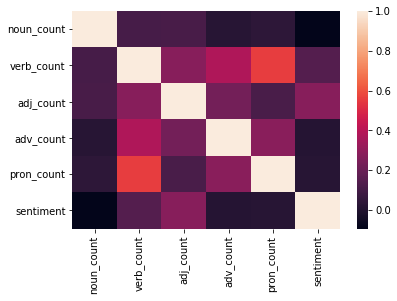

In [74]:
sentiment_correlations = df_sentiment_pos.corr();
sns.heatmap(sentiment_correlations);

# Features of a helpful review

any features you think may distinguish between helpful and unhelpful reviews

In [143]:
df_helpful = df[df['helpful-count'] > 100]

In [144]:
df_helpful.head()

company           location         dates  \
1     google  Mountain View, CA   Jun 21 2013   
2     google       New York, NY   May 10 2014   
3     google  Mountain View, CA    Feb 8 2015   
6431  google  Bengaluru (India)    Aug 4 2014   
7819  amazon        Phoenix, AZ          None   

                                            job-title  \
1                   Former Employee - Program Manager   
2            Current Employee - Software Engineer III   
3               Current Employee - Anonymous Employee   
6431             Current Employee - Software Engineer   
7819  Current Employee - Software Development Manager   

                                                summary  \
1     Moving at the speed of light, burn out is inev...   
2     Great balance between big-company security and...   
3     The best place I've worked and also the most d...   
6431                 Great place for software engineers   
7819                           An Amazing Place to Work   

                                                   pros  \
1     1) Food, food, food. 15+ cafes on main campus ...   
2     * If you're a software engineer, you're among ...   
3     You can't find a more well-regarded company th...   
6431  Amazing work culture, cutting edge work, flexi...   
7819  I've been at Amazon for a month now, and I've ...   

                                                   cons  \
1     1) Work/life balance. What balance? All those ...   
2     * It *is* becoming larger, and with it comes g...   
3     I live in SF so the commute can take between 1...   
6431  Your growth in the company directly depends on...   
7819  No cons, so far - seriously. Like I said, I'm ...   

                                         advice-to-mgmt  rating  \
1     1) Don't dismiss emotional intelligence and ad...     4.0   
2     Keep the focus on the user. Everything else wi...     5.0   
3     Keep on NOT micromanaging - that is a huge ben...     5.0   
6431                                               none     5.0   
7819                                               none     5.0   

     work-balance-stars  ... helpful-count word_count textblob_sentiment  \
1                   2.0  ...          2094         10               0.20   
2                   5.0  ...           949          9               0.55   
3                   2.0  ...           498         10               0.75   
6431                5.0  ...           203          5               0.80   
7819                4.0  ...           580          5               0.60   

     nltk_sentiment     label  class   datetime    year  day_name  month  
1            0.0000  positive      1 2013-06-21  2013.0    Friday    6.0  
2            0.8689  positive      1 2014-05-10  2014.0  Saturday    5.0  
3            0.4601  positive      1 2015-02-08  2015.0    Sunday    2.0  
6431         0.6249  positive      1 2014-08-04  2014.0    Monday    8.0  
7819         0.5859  positive      1        NaT     NaN       NaN    NaN  

[5 rows x 24 columns]

In [146]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

matplotlib.rc('axes', edgecolor='black')

<Figure size 432x288 with 0 Axes>

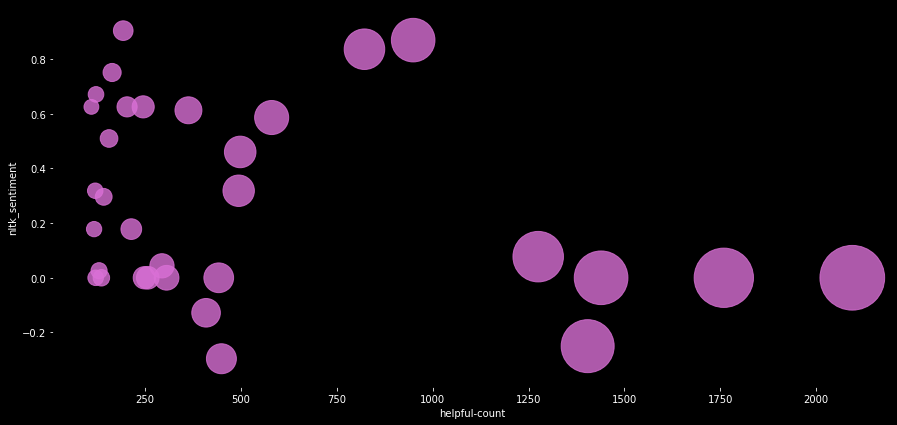

<Figure size 432x288 with 0 Axes>

In [147]:
df_helpful.plot(kind='scatter',x='helpful-count', y='nltk_sentiment', color='orchid',
        figsize=(15,7), alpha=0.8, s=[x*2 for x in df_helpful['helpful-count']]);

plt.figure()

# Export Dataframe

In [ ]:
df.to_csv("employee_reviews_features.csv")
df.head()